In [30]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [31]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [48]:
IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])
#test_data = dsets.MNIST(root='./data', train=True, download=True)
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

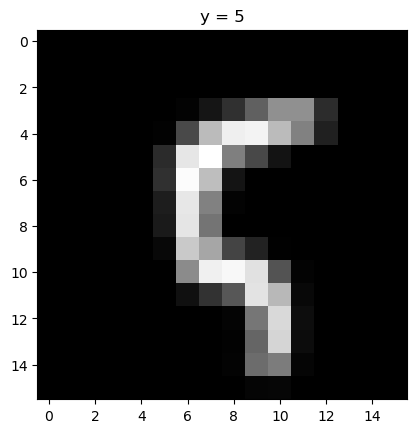

In [33]:
show_data(train_dataset[100])

In [34]:
class CNN(nn.Module):
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5,stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc = nn.Linear(out_2*4*4,10)
        
    def forward(self, x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = x.view(x.size(0), -1)
        return x

In [35]:
cnn = CNN()
print(cnn)

CNN(
  (conv_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)


In [63]:
learning_rate,num_epochs    = 0.1,4
model                       = CNN(out_1=16, out_2=32)
criterion                   = nn.CrossEntropyLoss()
optimizer                   = torch.optim.SGD(model.parameters(),lr=learning_rate)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)


for epoch in range(num_epochs):
    
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z,y)
        loss.backward()
        optimizer.step()



In [64]:
correct = 0
N_test=len(validation_dataset)
for x_test, y_test in validation_loader:
    z = model(x_test)
    _, yhat = torch.max(z.data, 1)
    correct += (yhat == y_test).sum().item()
accuracy = correct / N_test
print(accuracy)

0.7651


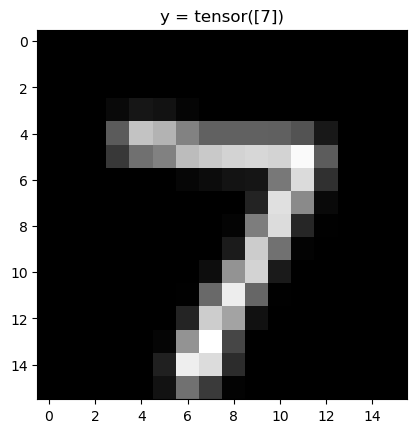

yhat:  tensor([7])


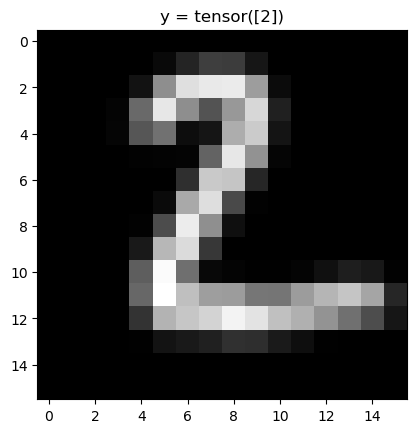

yhat:  tensor([2])


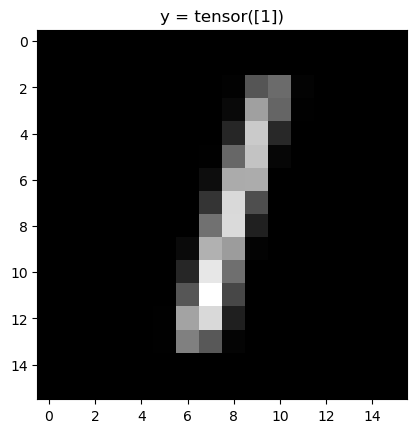

yhat:  tensor([1])


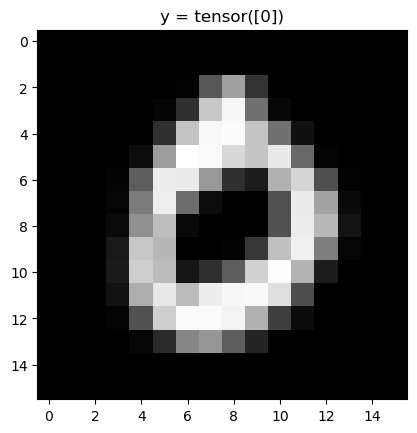

yhat:  tensor([0])


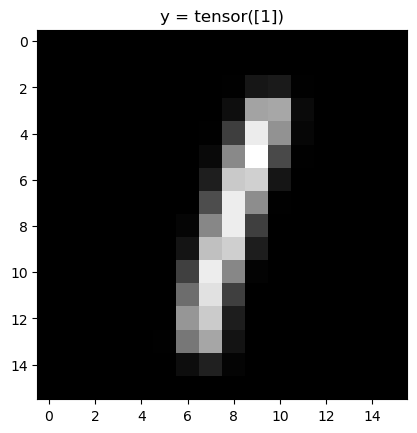

yhat:  tensor([1])


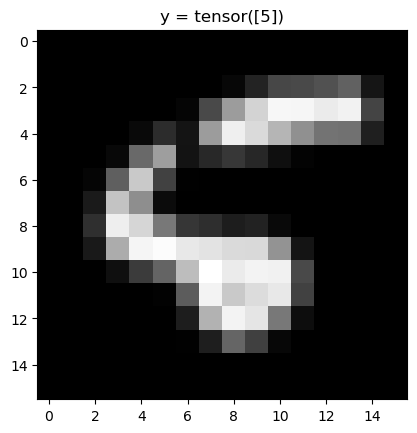

yhat:  tensor([5])


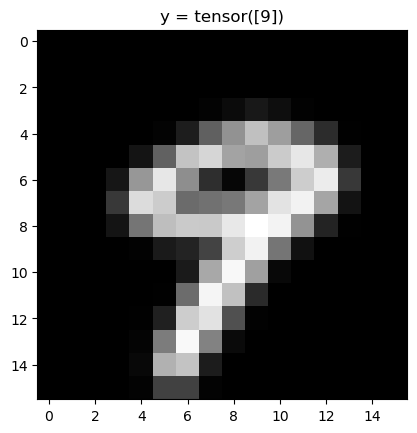

yhat:  tensor([9])


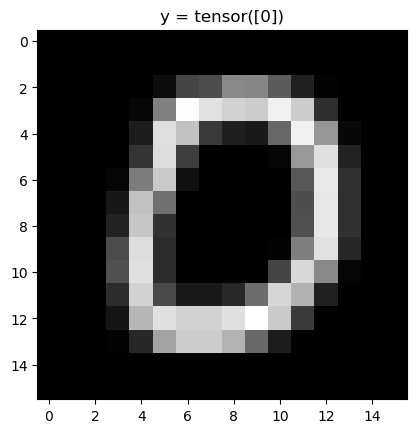

yhat:  tensor([0])


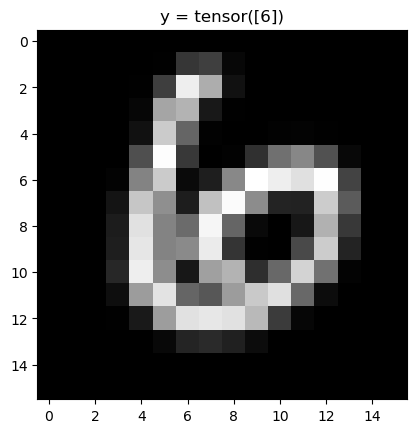

yhat:  tensor([6])


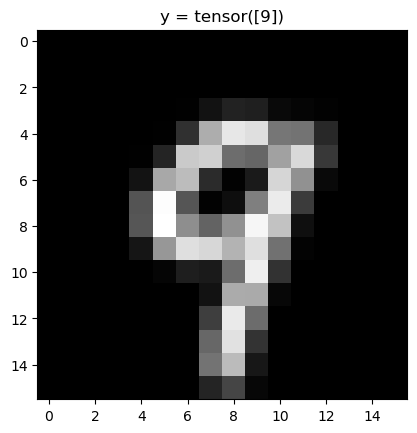

yhat:  tensor([9])


In [66]:
count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if y==yhat:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 10:
        break  